## CNN Classifier For Traffic Sign Recognition

In this project a Convolutional Neural Network is built for Traffic Signs Recognition.
In this project the [German Traffic Signs Dateset](http://benchmark.ini.rub.de/) is used. The Network is trained using a CPU.


## The following steps have been followed to build this project:

#### 1. Load the data and prepare the train, the validation and the test sets.
#### 2. Get a statistical summary for the different sets and visulaize some data.
#### 3. Design a model architecture for the CNN.
#### 4. Train the model using the train data set and validate it using the validation data set.
#### 5. Test the final model architecture using the test set.
### 6. Testing the final model on new images

---
### 1. Load the data and prepare the train, the validation and the test sets.
The data sets are prepared as follows:
* 1.1 Load the data sets with their labels.
* 1.2 Converting the images from RGB to Gray scale.
* 1.3 Normalizing the images.


In [1]:
# 1.1 Load the data sets with their labels
# Load pickled data
import pickle
import pandas as pd
import cv2
import numpy as np

# Path to the data sets
training_file = "/home/mostafa/Desktop/keras/CarND-Traffic-Sign-Classifier-Project/traffic-signs-data/train.p"
validation_file="/home/mostafa/Desktop/keras/CarND-Traffic-Sign-Classifier-Project/traffic-signs-data/valid.p"
testing_file = "/home/mostafa/Desktop/keras/CarND-Traffic-Sign-Classifier-Project/traffic-signs-data/test.p"

#Load the data sets
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
#Data sets of RGB (32x32x3) images and thier lables    
X_trainrgb, y_train = train['features'], train['labels']
X_validationrgb, y_validation = valid['features'], valid['labels']
X_testrgb, y_test = test['features'], test['labels']




In [2]:
# 1.2 Converting the images from RGB to Gray scale
X_train=[]
X_validation=[]
X_test=[]
for item in X_trainrgb:
    X_train.append(cv2.cvtColor(item,cv2.COLOR_RGB2GRAY))
    
for item in X_validationrgb:
    X_validation.append(cv2.cvtColor(item,cv2.COLOR_RGB2GRAY))
    
for item in X_testrgb:
    X_test.append(cv2.cvtColor(item,cv2.COLOR_RGB2GRAY))

X_train=np.array(X_train)
X_train=X_train.reshape(len(X_train),32,32,1)

X_validation=np.array(X_validation).reshape((len(X_validation),32,32,1))
X_test=np.array(X_test).reshape((len(X_test),32,32,1))

In [3]:
# 1.3 Normalizing the images
X_train=(X_train-np.mean(X_train))/np.std(X_train)
X_validation=(X_validation-np.mean(X_validation))/np.std(X_validation)
X_test=(X_test-np.mean(X_test))/np.std(X_test)

---

## 2. Get a statistical summary for the different sets and visualize some data.
In the sets we have, we can find that:
* Number of training examples = 34799
* Number of validation examples = 4410
* Number of test examples = 34799
* Image shape is (32,32,1)
* Number of classes = 43



In [4]:
### Use python, pandas or numpy methods rather than hard coding the results

# Number of training examples
n_train = len(train['features'])

# Number of validation examples
n_validation = len(valid['features'])

# Number of testing examples.
n_test = len(test['features'])

#The shape of an traffic sign image
image_shape = X_train[0,:].shape

# classes/labels in the dataset.
signs=pd.read_csv("./signnames.csv")

n_classes = len(signs)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
#print("signs shape =", signs.loc[40][1])

Number of training examples = 34799
Number of testing examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 1)
Number of classes = 43


9
No passing


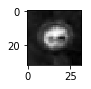

In [5]:
# Visualize Data
#View a sample from the dataset.

import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap='gray')
print(y_train[index])
print(signs.loc[y_train[index]][1])


---
## 3. Design a model architecture for the CNN.
* 3.1. first we will import the modules that we need.
* 3.2. Shuffle the training set for better learning
* 3.3. Then, we will build our model as a function whose output will be the input of the softmax function 
* The final model consists of the following layers
*  
*  Input         		( 32x32x1 Gray scale image ) 					 
*  Convolution 5x5    	( 1x1 stride, VALID padding, outputs 28x28x6)
*  RELU                
*  Convolution 5x5		( 1x1 stride, VALID padding, outputs 24x24x6)
*  RELU																
*  Convolution 5x5		( 1x1 stride, VALID padding, outputs 20x20x16)
*  RELU				
*  Max pooling	      	( 2x2 stride,  outputs 10x10x16) 				
*  Fully Connected	    ( input=10x10x16	output=120)				
*  RELU				
*  Fully connected		( input=120			output=84 )
*  RELU				
*  Dropout				( peak= 0.75 )					
*  Fully connected		( input=84			output=43 )
*  Softmax				( Softmax cross entropy using one_hot_encoding ) 
 						
 						


In [6]:
# 3.1. Import the modules that we need
import tensorflow as tf
from tensorflow.contrib.layers import flatten
import cv2


In [7]:
# 3.2. Shuffle the trainig set for better learning
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)


In [8]:
# 3.3. Build our model as a function
def modelNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # RELU: Activation.
    conv1 = tf.nn.relu(conv1)
    
    # Layer 2: Convolutional. Input = 28x28x6. Output = 24x24x6.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 6), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(6))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    # RELU: Activation.
    conv2 = tf.nn.relu(conv2)

    
    # Layer 3: Convolutional. Input= 24x24x6. Output = 20x20x16.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(16))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    
    # RELU: Activation.
    conv3 = tf.nn.relu(conv3)

    # Pooling. Input = 20x20x16. Output = 10x10x16.
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = (10,10,16). Output = 10x10x16.
    fc0   = flatten(conv3)
    
    # Layer 4: Fully Connected. Input = 10x10x16. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(10*10*16, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # RELU: Activation.
    fc1    = tf.nn.relu(fc1)

    # Layer 5: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # RELU: Activation.
    fc2    = tf.nn.relu(fc2)
    
    # Dropout
    fc2 =tf.nn.dropout(fc2,p)
    
    # Layer 6: Fully Connected. Input = 84. Output = 43.
    fc4_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc4_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc4_W) + fc4_b
    
    return logits


---
## 4. Train the model using the train data set and validate it using the validation data set.
The model can be trained by following the next steps:
* 4.1. Choosing the hyperparameters ( learning rate, epochs, batch size)
* 4.2. Making placeholders for the input, the ouput and the dropout peak
* 4.3. Setting up the loss function and the optimizer
* 4.4. Definig an evaluation function to be used for cross validation
* 4.5. Train the model and save the parameters

In [9]:
# 4.1. Choosing the hyperparameters
EPOCHS = 20
BATCH_SIZE = 128
rate = 0.001

In [10]:
# 4.2. Placeholders for the input, the ouput and the dropout peak
x = tf.placeholder(tf.float32, (None, 32, 32,1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
p=tf.placeholder(tf.float32)

In [11]:
# 4.3. Setting up the loss function and the optimizer
logits = modelNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


In [12]:
# 4.4. Definig an evaluation function to be used for cross validation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver() #To save the model parameters (weights, biases)

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, p:1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [16]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,p:0.75})            
        # Validation
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    
    saver.save(sess, './modelnet')
    print("Model saved")
        
            
        

Training...

EPOCH 1 ...
Validation Accuracy = 0.832

EPOCH 2 ...
Validation Accuracy = 0.908

EPOCH 3 ...
Validation Accuracy = 0.937

EPOCH 4 ...
Validation Accuracy = 0.941

EPOCH 5 ...
Validation Accuracy = 0.956

EPOCH 6 ...
Validation Accuracy = 0.948

EPOCH 7 ...
Validation Accuracy = 0.963

EPOCH 8 ...
Validation Accuracy = 0.964

EPOCH 9 ...
Validation Accuracy = 0.960

EPOCH 10 ...
Validation Accuracy = 0.961

EPOCH 11 ...
Validation Accuracy = 0.962

EPOCH 12 ...
Validation Accuracy = 0.968

EPOCH 13 ...
Validation Accuracy = 0.967

EPOCH 14 ...
Validation Accuracy = 0.966

EPOCH 15 ...
Validation Accuracy = 0.971

EPOCH 16 ...
Validation Accuracy = 0.964

EPOCH 17 ...
Validation Accuracy = 0.962

EPOCH 18 ...
Validation Accuracy = 0.966

EPOCH 19 ...
Validation Accuracy = 0.959

EPOCH 20 ...
Validation Accuracy = 0.966

Model saved


---
## 5. Test the final model architecture on the test set.
The saved model is restored an tested on the test set

In [18]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.946


In [105]:
new_images=[]
new_images.append(cv2.cvtColor(cv2.imread('./new_images/1.png'),cv2.COLOR_RGB2GRAY))
new_images.append(cv2.cvtColor(cv2.imread('./new_images/2.png'),cv2.COLOR_RGB2GRAY))
new_images.append(cv2.cvtColor(cv2.imread('./new_images/3.png'),cv2.COLOR_RGB2GRAY))
new_images.append(cv2.cvtColor(cv2.imread('./new_images/4.png'),cv2.COLOR_RGB2GRAY))
new_images.append(cv2.cvtColor(cv2.imread('./new_images/5.png'),cv2.COLOR_RGB2GRAY))
new_images=np.array(new_images).reshape([5,32,32,1])





In [ ]:

# Softmax predicition
for i in range(5):
    test=new_images[i,:,:,:].reshape(1,32,32,1).astype(np.float32)
    logits=modelNet(test)
    probs=tf.nn.softmax(logits)
    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        prediction=sess.run(probs,{x:test})
        print(prediction)



### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")